# Stationary & Lags

## Stationary
Para poder modelar una serie temporal necesitamos que sea estacionaria, lo que significa que sus estadísticos no cambien con el tiempo. Estadísticos como la media, varianza y covarianza.

Veamos en un ejemplo de cómo comprobar si la serie es estacionaria y en caso contrario qué tenemos que hacer para convertirla.

Cargamos datos:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

series = pd.read_csv('data/FB.csv', header=0, index_col=0)
series.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-08,76.180000,77.250000,75.400002,76.519997,76.519997,25733900
2014-12-09,75.199997,76.930000,74.779999,76.839996,76.839996,25358600
2014-12-10,76.650002,77.550003,76.070000,76.180000,76.180000,32210500
2014-12-11,76.519997,78.519997,76.480003,77.730003,77.730003,33462100
2014-12-12,77.160004,78.879997,77.019997,77.830002,77.830002,28091600


Representamos la serie

<AxesSubplot:xlabel='Date'>

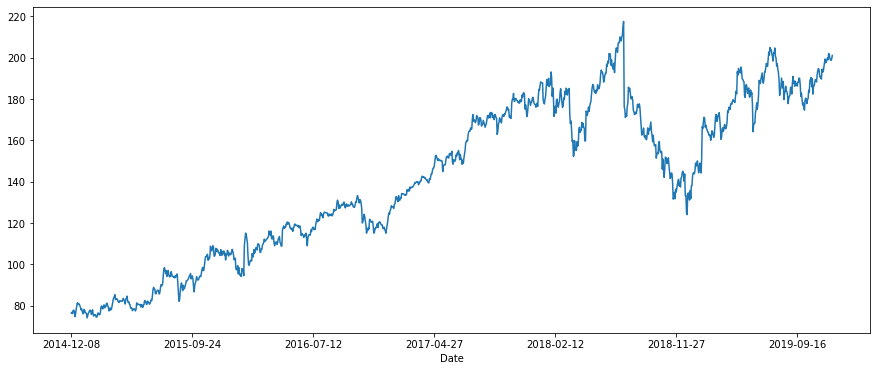

In [2]:
series['Close'].plot(figsize=(15,6))

Vemos que no es estacionaria. Presenta una tendencia y no es lo mismo la varianza en cada zona de la serie temporal

Calculamos sus estadísticos

In [3]:
series['Close'].describe()

count    1259.000000
mean      141.441628
std        38.183670
min        74.050003
25%       109.729999
50%       143.679993
75%       176.259995
max       217.500000
Name: Close, dtype: float64

Ejecutamos el test de Dickey-Fuller para comprobar si la serie temporal es estacionaria.

El test de DF plantea la hipótesis nula de que la serie NO es estacionaria. Se trata de comprobar sus p-values, si quedan por encima o por debajo su nivel de significación (0.05). Si queda por encima de su nivel de significación, aceptamos la hipótesis nula y concluimos que la serie NO es estacionaria. En caso contrario, rechazaríamos la hipótesis nula, en favor de la hipótesis alternativa, con la que concluiremos que la serie es estacionaria.

In [5]:
from statsmodels.tsa.stattools import adfuller
adfuller(series['Close'])[1]

0.6115683442065493

Para solucionar esto, diferenciamos la serie. Normalmente con una diferenciación de 1 es suficiente.

In [7]:
series2 = series[['Close']].copy()
series2['close_diff_1'] = series2['Close'].diff(1)
series2['close_diff_2'] = series2['Close'].diff(2)
series2.head()

,Close,close_diff_1,close_diff_2
Date,,,
2014-12-08,76.519997,NaN,NaN
2014-12-09,76.839996,0.319999,NaN
2014-12-10,76.180000,-0.659996,-0.339997
2014-12-11,77.730003,1.550003,0.890007
2014-12-12,77.830002,0.099999,1.650002


Representamos la diferenciación de 1

<AxesSubplot:xlabel='Date'>

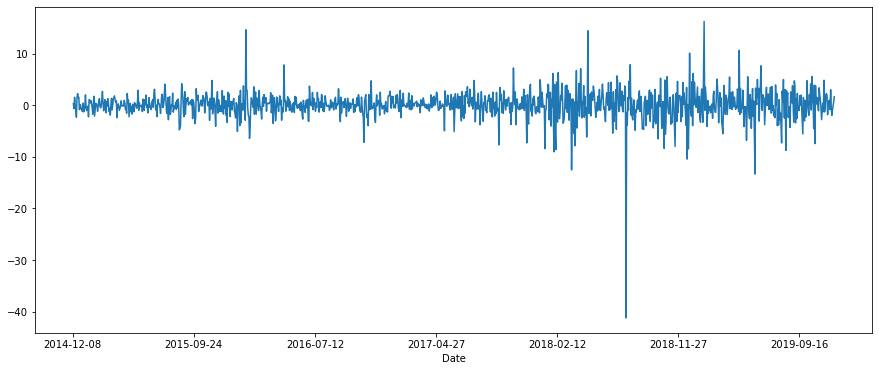

In [8]:
series2['close_diff_1'].plot(figsize=(15,6))

Ahora calculamos sus estadísticos

In [9]:
series2['close_diff_1'].describe()

count    1258.000000
mean        0.098990
std         2.683343
min       -41.240005
25%        -0.970001
50%         0.099998
75%         1.360000
max        16.270004
Name: close_diff_1, dtype: float64

Ya que hemos diferenciado, y supuestamente ahora la serie es estacionaria, vamos a volver a probar con el test de Dickey-Fuller

In [10]:
adfuller(series2['close_diff_1'].dropna())[1]

0.0

#### Ejemplo AVG TEM ANUAL
Ahora utilizaremos los datos 'Mean_Temp_IMD_2017.csv'

In [11]:
series_tmp = pd.read_csv('data/Mean_Temp_IMD_2017.csv', header=0, index_col=0)
series_tmp.head()

,ANNUAL_AVG_TEMPRATURE
YEAR,
1901,24.23
1902,24.33
1903,23.80
1904,23.86
1905,23.71


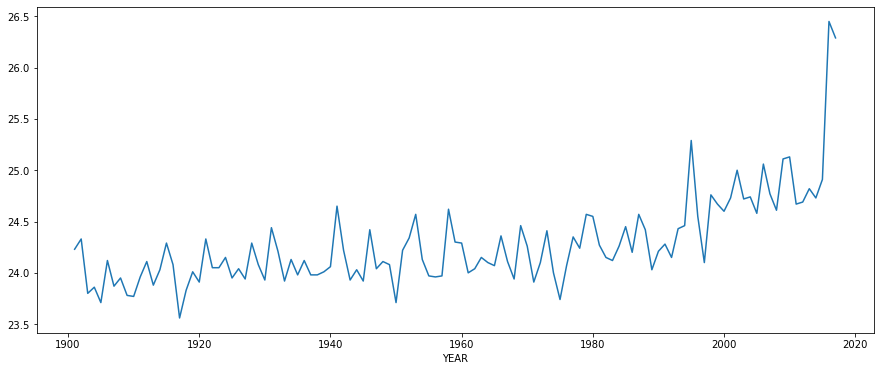

In [12]:
series_tmp['ANNUAL_AVG_TEMPRATURE'].plot(figsize=(15,6));

DF test: 0.9988
DF test diff: 0.0


<AxesSubplot:xlabel='YEAR'>

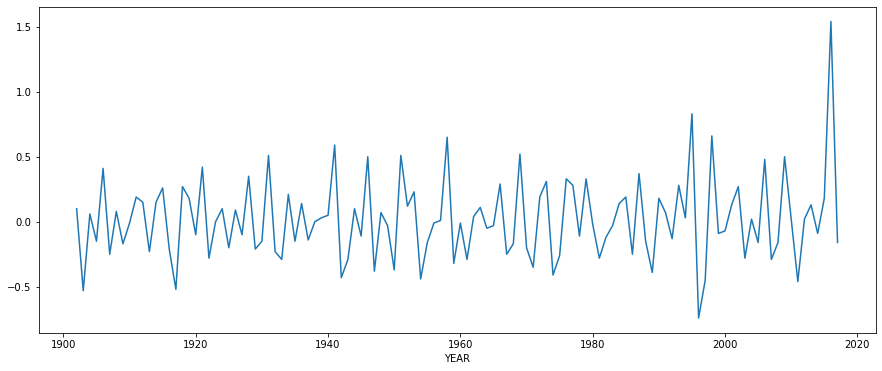

In [17]:
print('DF test:',round(adfuller(series_tmp['ANNUAL_AVG_TEMPRATURE'])[1],4))

diferencio_tmp = series_tmp['ANNUAL_AVG_TEMPRATURE'].diff().dropna()

print('DF test diff:',round(adfuller(diferencio_tmp)[1],4))

diferencio_tmp.plot(figsize=(15,6))

## Lag
Un lag es un retraso en el tiempo. Se utiliza este concepto para ver la relación que tiene cada instante de un time series con instantes anteriores.

Se pueden calcular mediante shift

In [21]:
series_tmp['lag1'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(1)
series_tmp['lag2'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(2)
series_tmp['lag3'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(3)
series_tmp['lag4'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(4)
series_tmp['lag5'] = series_tmp['ANNUAL_AVG_TEMPRATURE'].shift(5)
series_tmp.dropna().head()

,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
YEAR,,,,,,
1906,24.12,23.71,23.86,23.80,24.33,24.23
1907,23.87,24.12,23.71,23.86,23.80,24.33
1908,23.95,23.87,24.12,23.71,23.86,23.80
1909,23.78,23.95,23.87,24.12,23.71,23.86
1910,23.77,23.78,23.95,23.87,24.12,23.71


Como los algoritmos de regresión en time series dependen de instantes anteriores, hay que intentar evitar que los lags estén muy autocorrelados, por que sino sufriremos de multicolinearidad.

Vamos a comprobar cuánto de correlados están los lags

In [22]:
series_tmp.corr()

,ANNUAL_AVG_TEMPRATURE,lag1,lag2,lag3,lag4,lag5
ANNUAL_AVG_TEMPRATURE,1.000000,0.709562,0.519207,0.559016,0.543152,0.541317
lag1,0.709562,1.000000,0.630760,0.495757,0.558646,0.529761
lag2,0.519207,0.630760,1.000000,0.636485,0.500332,0.560252
lag3,0.559016,0.495757,0.636485,1.000000,0.627644,0.484547
lag4,0.543152,0.558646,0.500332,0.627644,1.000000,0.619090
lag5,0.541317,0.529761,0.560252,0.484547,0.619090,1.000000


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

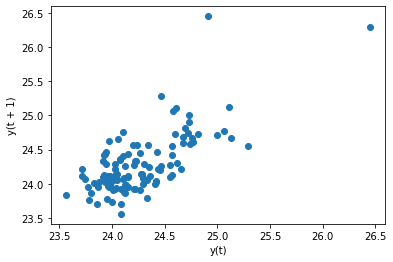

In [26]:
from pandas.plotting import lag_plot
lag_plot(series_tmp['ANNUAL_AVG_TEMPRATURE'],lag=1)

## Autocorrelation plot
Tengo que ver cómo es la gráfica de autocorrelación, ya que si voy a utilizar una regresión lineal, no queremos que los lags estén muy correlacionados, unos con otros.

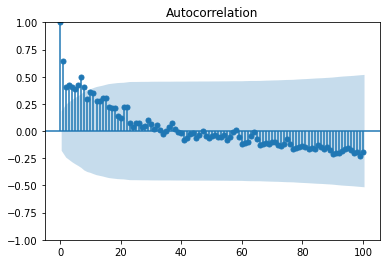

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series_tmp['ANNUAL_AVG_TEMPRATURE'],lags=100);

¿Cómo interpreto esto? Correlación muy alta entre cada dato y sus lags. Esto es debido a que la serie no es estacionaria.

Diferenciando, perdemos esa correlación entre los lags, y conseguimos una serie temporal más adecuada para entrenar nuestros modelos.

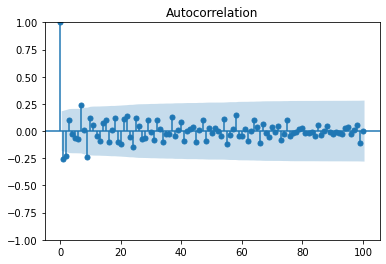

In [33]:
diferencio = series_tmp['ANNUAL_AVG_TEMPRATURE'].diff().dropna()
plot_acf(diferencio,lags=100);

Probamos la autocorrelacion con los datos de bolsa y sus lags, sin diferenciar

In [34]:
series2 = series[['Close']].copy()
series2['lag1'] = series2['Close'].shift(1)
series2['lag2'] = series2['Close'].shift(2)
series2['lag3'] = series2['Close'].shift(3)
series2['lag4'] = series2['Close'].shift(4)
series2['lag5'] = series2['Close'].shift(5)
series2.head()

,Close,lag1,lag2,lag3,lag4,lag5
Date,,,,,,
2014-12-08,76.519997,NaN,NaN,NaN,NaN,NaN
2014-12-09,76.839996,76.519997,NaN,NaN,NaN,NaN
2014-12-10,76.180000,76.839996,76.519997,NaN,NaN,NaN
2014-12-11,77.730003,76.180000,76.839996,76.519997,NaN,NaN
2014-12-12,77.830002,77.730003,76.180000,76.839996,76.519997,NaN


In [35]:
series2.corr()

,Close,lag1,lag2,lag3,lag4,lag5
Close,1.000000,0.997527,0.995142,0.992821,0.990635,0.988476
lag1,0.997527,1.000000,0.997524,0.995134,0.992809,0.990617
lag2,0.995142,0.997524,1.000000,0.997519,0.995125,0.992795
lag3,0.992821,0.995134,0.997519,1.000000,0.997515,0.995116
lag4,0.990635,0.992809,0.995125,0.997515,1.000000,0.997510
lag5,0.988476,0.990617,0.992795,0.995116,0.997510,1.000000


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

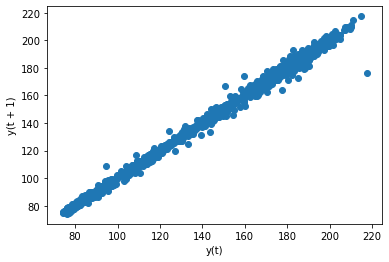

In [36]:
lag_plot(series2['Close'])

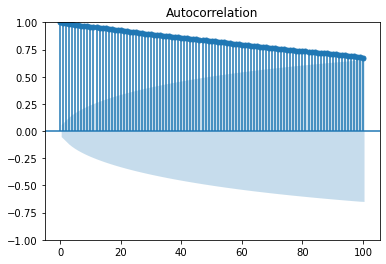

In [38]:
plot_acf(series2['Close'],lags=100);

Diferenciando, me baja mucho la correlación, que es lo que estamos buscando.

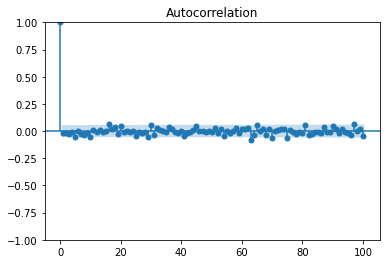

In [39]:
diferencio = series2['Close'].diff().dropna()

plot_acf(diferencio, lags=100);